# The Skewed Kurtosis

This file contains all the Exploratory Data Analysis. It may contain some handling of missing data just for analysis. Final missing data is handled in a separate file with Models.


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
import csv
import seaborn as sns

In [4]:
df_train = pd.read_csv("../Data/train.csv")
df_test = pd.read_csv('../Data/test.csv')
train=df_train.copy()
test=df_test.copy()
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
print(train.shape) # Taking a look at the shape and few columns
print(test.shape) #Taking a look at the shape of test data

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print(train.shape)
print(test.shape)


(1460, 81)
(1459, 80)
(1460, 80)
(1459, 79)


In [6]:
train.dtypes #Taking a look atthe data types

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [7]:
train.SalePrice.describe() #Getting more inf on SalePrice

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Mean is 180K and 75% value is 214K. Max is 755K. Looks like the SalesPrice is skewed. Let's check the skewness

Skew is: 1.88287575977


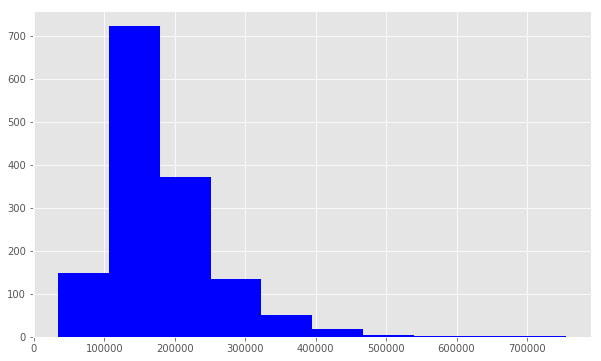

In [8]:
print ("Skew is:", train.SalePrice.skew()) #Printing the skewness
plt.hist(train.SalePrice, color='blue')
plt.show()

Skewness is positive so it is Right Skewed. Will take a log for target of SalesPrice. Skewness should be closer to zero.



Skew is: 0.121335062205


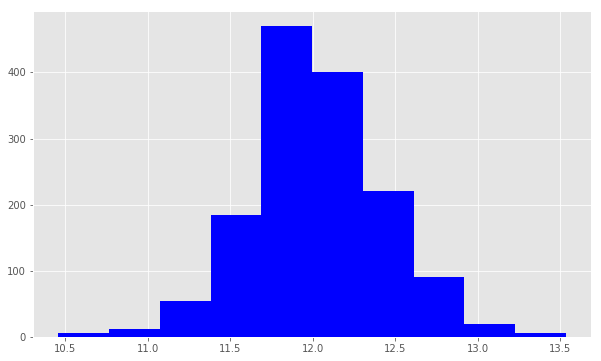

In [9]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

That is better skew. Looking at some correlations.

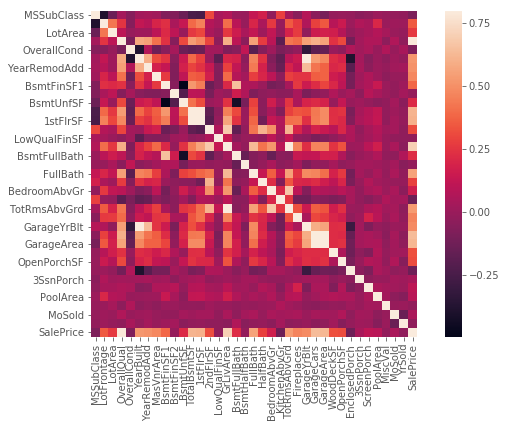

In [22]:
corr_all = train.corr()
#f, ax = plt.subplots(figsize=(12, 9)) #defining fig size
sns.heatmap(corr_all, vmax=.8, square=True)

There is Significantly high correlation between TotalBsmntSF and 1stFlrSF, GarageYrBlt and YearBlt, GrLivArea and TotRmsAbvGrnd, GarageCars and GarageArea.
Now looking only at numerical variables.


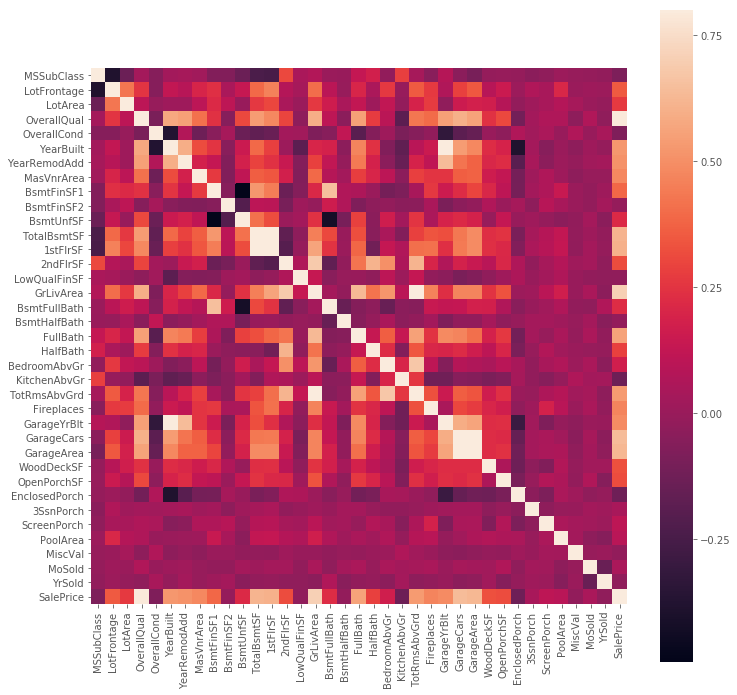

In [21]:
train_numeric = train.select_dtypes(exclude=['object']) #Using only numerical columns
corr_num = train_numeric.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_num, vmax=.8, square=True)

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(25,25))
plt.title('Correlation among Features', y=1.05, size = 20)
sns.heatmap(train_num.corr(),
            linewidths=0.1, 
            center = 0,
            vmin = -1,
            vmax= 1, 
            annot=True,
            square=True, 
            fmt='.2f', 
            annot_kws={'size': 10},
            cmap=colormap, 
            linecolor='white');

Need to look at only SalesPrice Correlation

In [12]:
print (corr_num['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Some of the top and low variables should be investigated more.
Looking first at Overall Quality


In [13]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

Should look at the SalePrice median in each of the above bucket to see how it varies

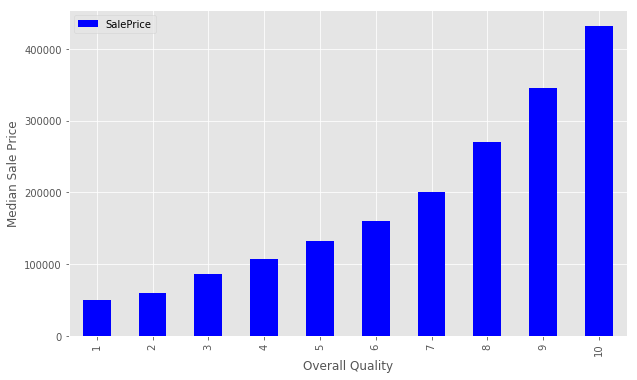

In [14]:
quality_Price = train.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)
quality_Price.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.show()

The above relationship looks good.
Now let's check GrLivArea.

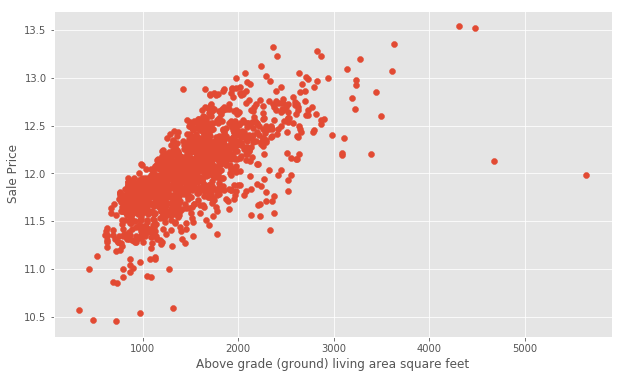

In [15]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

Increase in living area corresponds to increase in price. Also, look at 2 outliers. Will look at them later when dealing with outliers.
Now plotting the same for GarageArea

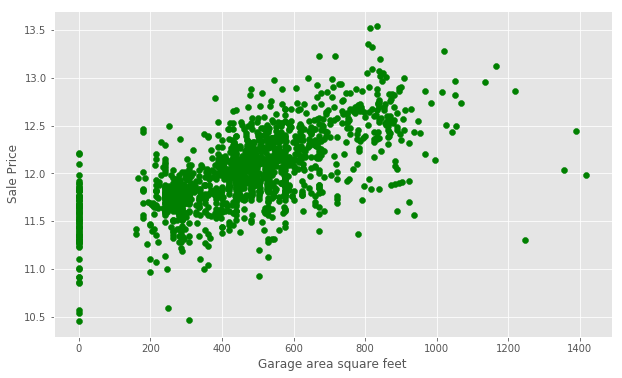

In [16]:
plt.scatter(x=train['GarageArea'], y=target, c='Green')
plt.ylabel('Sale Price')
plt.xlabel('Garage area square feet')
plt.show()

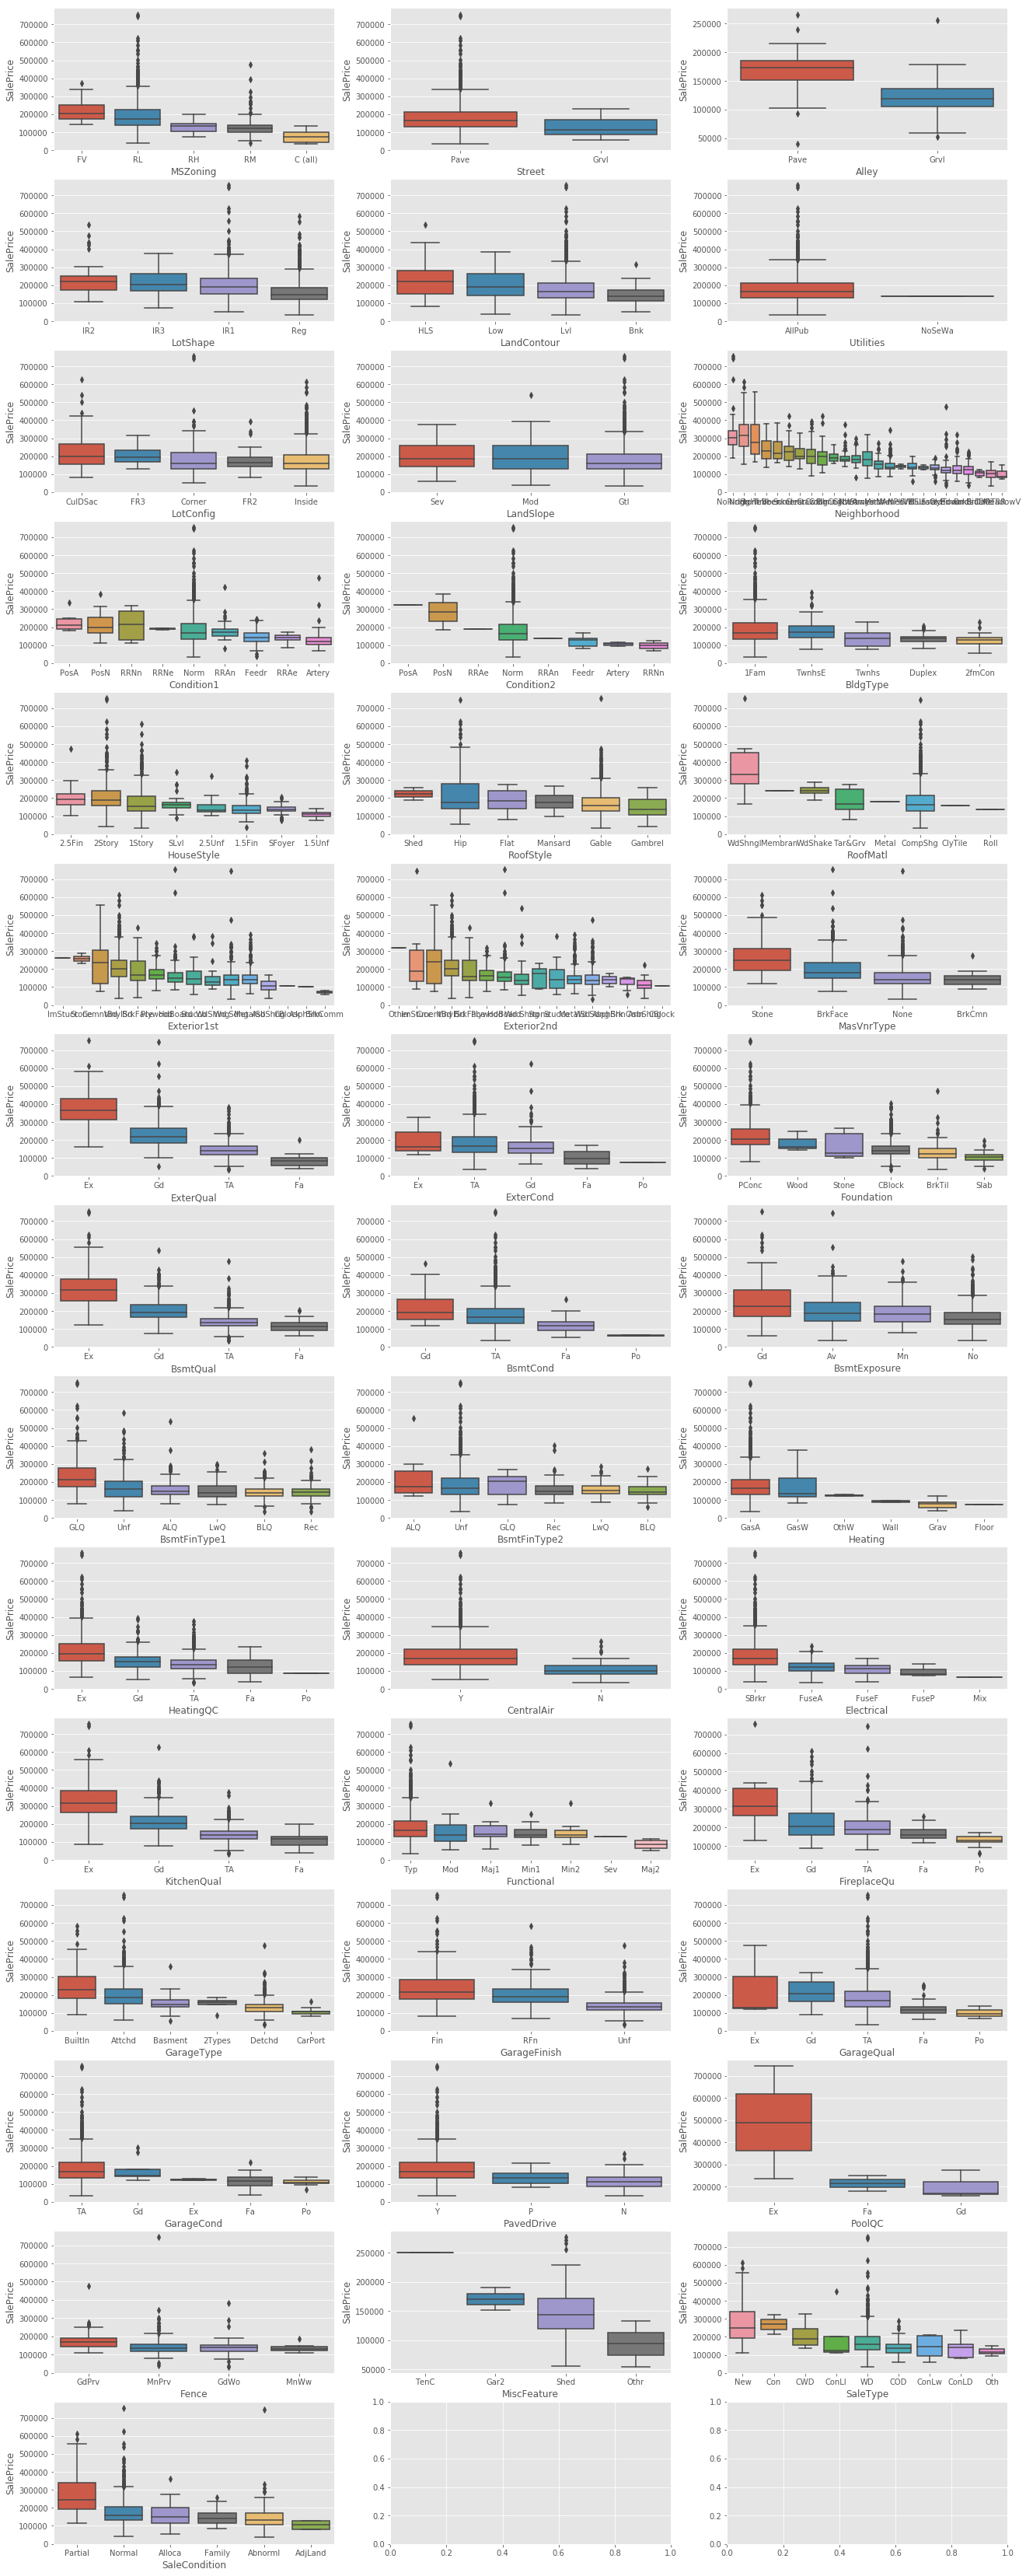

In [18]:
obj_cols = train.select_dtypes(include = ['object'])
fig, axes = plt.subplots(ncols=3, nrows= 15,figsize=(22,60))

for i, c in enumerate(obj_cols):
    row = i // 3
    col = i % 3
    ax_curr = axes[row, col]
    order = train.groupby(c)['SalePrice'].mean().fillna(0).sort_values()[::-1].index
    sns.boxplot(x=train[c], y=train['SalePrice'], ax = ax_curr, order=order)
plt.show()

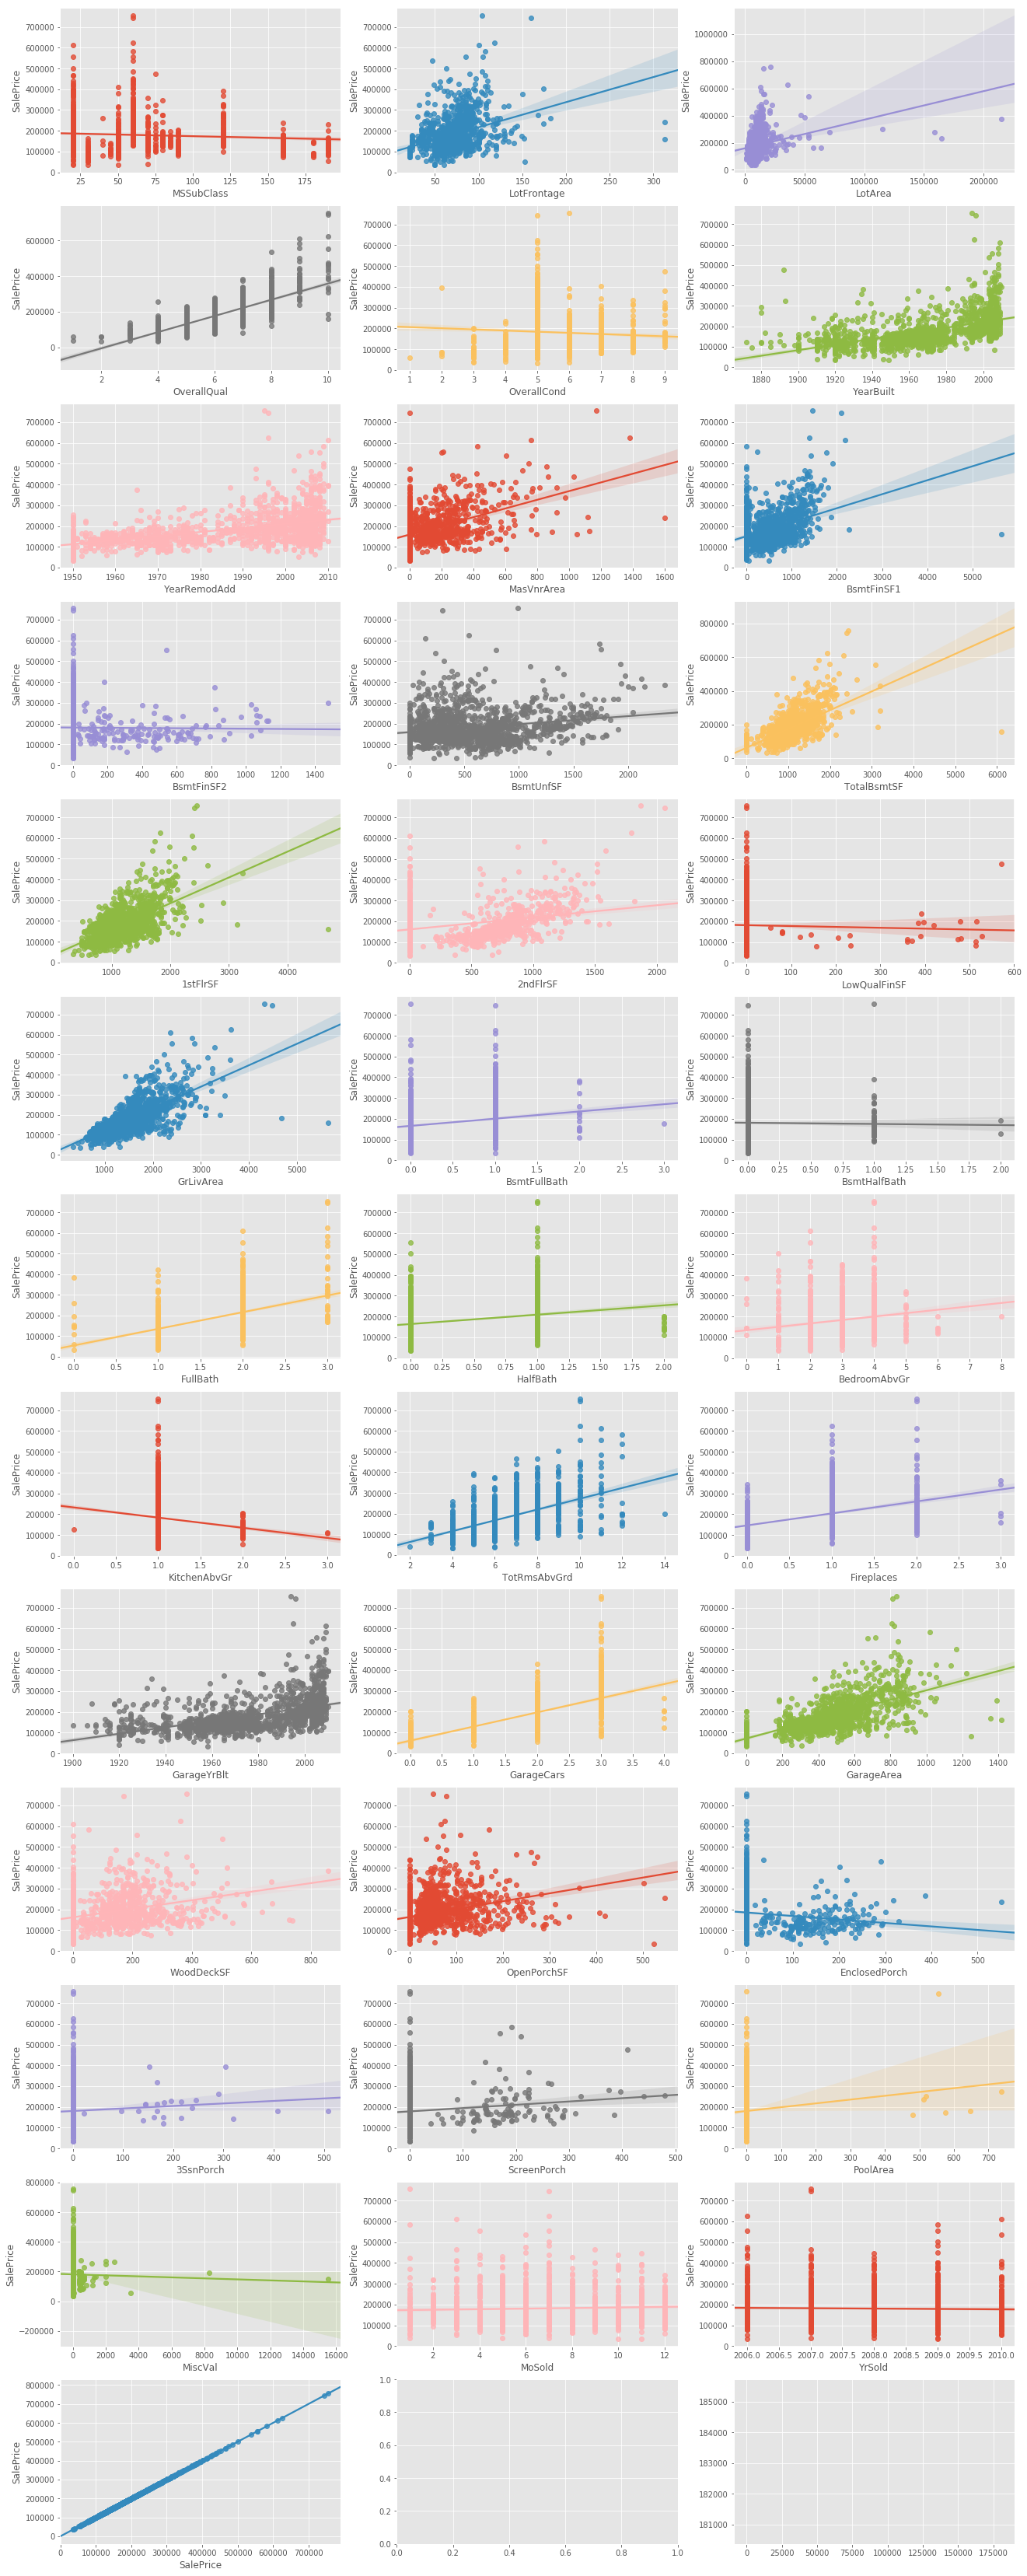

In [20]:
num_cols = train._get_numeric_data()

fig, axes = plt.subplots(ncols=3, nrows= 13,figsize=(22,60))

for i, c in enumerate(num_cols):
   row = i // 3
   col = i % 3
   ax_curr = axes[row, col]
   
   sns.regplot(x=train[c], y=train['SalePrice'], ax = ax_curr)
plt.show()
    

AxesSubplot(0.125,0.125;0.775x0.755)


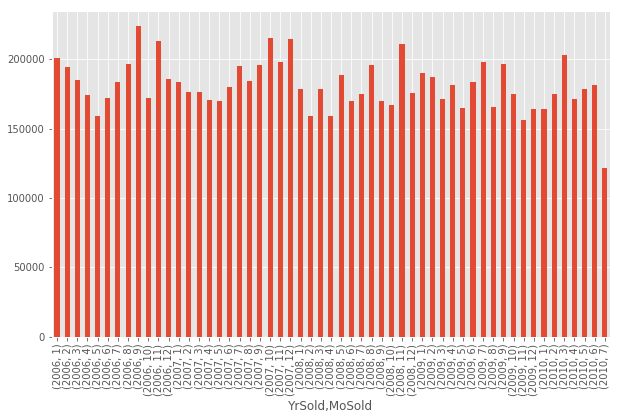

In [53]:
#num_cols = ['']

#fig, axes = plt.subplots(ncols=3, nrows= 13,figsize=(22,60))

#print(train.groupby(['YrSold'])['SalePrice'].mean())
print(train.groupby(['YrSold','MoSold'])['SalePrice'].aggregate(np.mean).plot(kind='bar'
                                                                              #,colormap={'2006':'red','2007':'blue','2008':'green','2009':'yellow'}
                                                                             ))
#print(train.groupby(['MoSold'])['SalePrice'].median().sort_values())
#print(train.groupby(['MoSold'])['SalePrice'].count().sort_values())
#sns.regplot(x=train["YrSold"], y=train['SalePrice'])
#plt.show()

In [301]:
cols=list(train.columns.values)
cols=cols[:-1]
cols

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [ ]:
cols=list(train.columns.values)

fig, axes = plt.subplots(ncols=3,nrows=11,figsize=(20,40))

for i, c in enumerate(cols):
    row = i // 3
    col = i % 3
    ax_curr = axes[row, col]
    order = train.groupby(c)['SalePrice'].mean().fillna(0).sort_values()[::-1].index
    sns.boxplot(x=train[c], y=train['SalePrice'], ax = ax_curr, order=order)
plt.show()
    

In [1]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.pairplot(train[cols])
#plt.show()

Notice how most of the values are 0. Looks like garage is not present or is missing data. Will have to look deeper on how to replace these when dealing with missing data.

In [67]:
##train = train[train['GarageArea'] < 1200] #do not want to delete outliers yet

In [68]:
##plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
#plt.ylabel('Sale Price')
#plt.xlabel('Garage area square feet')
#plt.show()

No more outliers in Garage Area, yay! Now let's look at missing data.

Feature Engineering has to be done on both train and test, so combining the datasets.

In [69]:
print(train.shape)
print(test.shape)
train.head()

(1460, 80)
(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [130]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))
all_data.head()

all_data size is : (2919, 79)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [131]:
missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
missing[missing[0]!=0]

,0
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
FireplaceQu,1420
LotFrontage,486
GarageFinish,159
GarageQual,159
GarageYrBlt,159
GarageCond,159


#### Qualitative 
PoolQC	1449 #'None'   
MiscFeature	1402 # None  
Alley	1364 #No alley access  
Fence	1174 #No Fence  
FireplaceQu	689 #No Fireplace  
GarageCond	81 #No Garage  
GarageType	81 #No Garage  
GarageFinish	81 #No Garage  
GarageQual	81  #No Garage  
BsmtExposure	38 #No Basement  
BsmtFinType2	38 #No Basement  
BsmtFinType1	37 #No Basement  
BsmtCond	37 #No Basement  
BsmtQual	37 #No Basement  
MasVnrType	8 #have to figure out 

BsmtHalfBath	2
Utilities	2
Functional	2
BsmtFullBath	2

Exterior2nd	1
KitchenQual	1
Exterior1st	1




#### Others
GarageArea	1
GarageCars	1
TotalBsmtSF	1
BsmtUnfSF	1
BsmtFinSF2	1
BsmtFinSF1	1

#### 
LotFrontage	258 #Have to figure out  
GarageYrBlt	81 #with year built  
MasVnrArea	8 #have to figure out   
Electrical 1 # can be deleted, will have to see  
MSZoning	4# most used  
SaleType	1 #Most frequently used 


#### Replace all qualitative variables with 'None'

In [132]:
col_none=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType']
for i in col_none:
    all_data[i].fillna(value='None', inplace=True)
all_data.head() #check if works fine

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [ ]:
ord_dic5={'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1}

Electrical


GarageFinish
Fin
RFn
Unf
NA

PavedDrive
Y
P
N

Fence
ord_dic6={'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'None':0}

#### Replace all quantitative variables with '0'

In [133]:
for i in ( 'GarageArea', 'GarageCars','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','MasVnrArea','BsmtFullBath', 'BsmtHalfBath'):
    all_data[i] = all_data[i].fillna(0)
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


Replacing GarageYrBlt with YearBuilt - GarageYrBuilt , if garage year is present


In [134]:
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)

In [135]:
all_data.loc[all_data['GarageYrBlt']>0, 'GarageYrBlt']=all_data['GarageYrBlt']-all_data['YearBuilt']    

KNN for Lotfrontage

In [136]:
from fancyimpute import KNN

all_data[['LotFrontage']]= KNN(k=30).complete(all_data[['LotFrontage']].as_matrix())

Imputing row 1/2919 with 0 missing, elapsed time: 0.931
Imputing row 101/2919 with 1 missing, elapsed time: 0.932
Imputing row 201/2919 with 0 missing, elapsed time: 0.933
Imputing row 301/2919 with 0 missing, elapsed time: 0.934
Imputing row 401/2919 with 0 missing, elapsed time: 0.934
Imputing row 501/2919 with 0 missing, elapsed time: 0.935
Imputing row 601/2919 with 0 missing, elapsed time: 0.935
Imputing row 701/2919 with 0 missing, elapsed time: 0.936
Imputing row 801/2919 with 0 missing, elapsed time: 0.937
Imputing row 901/2919 with 1 missing, elapsed time: 0.938
Imputing row 1001/2919 with 0 missing, elapsed time: 0.938
Imputing row 1101/2919 with 0 missing, elapsed time: 0.939
Imputing row 1201/2919 with 0 missing, elapsed time: 0.940
Imputing row 1301/2919 with 1 missing, elapsed time: 0.941
Imputing row 1401/2919 with 0 missing, elapsed time: 0.942
Imputing row 1501/2919 with 1 missing, elapsed time: 0.943
Imputing row 1601/2919 with 0 missing, elapsed time: 0.943
Imputing 

Replace MSZoning with mode

In [137]:
m=train['MSZoning'].mode()[0]
all_data['MSZoning'] = all_data['MSZoning'].fillna(m)

Replace Utilities with most occured value 

In [138]:
#all_data = all_data.drop(['Utilities'], axis=1)
m2=train['Utilities'].mode()[0]
all_data['Utilities'] = all_data['Utilities'].fillna(m2)

Data Description says assume 'Typ'

In [139]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

Replace Electrical with most occured value

In [140]:
m3=train['Electrical'].mode()[0]
all_data['Electrical'] = all_data['Electrical'].fillna(m3)

Replace KitchenQual,Exterior1st,Exterior2nd, SaleType with most occured value

In [141]:
m4=train['KitchenQual'].mode()[0]
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(m4)
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(train['SaleType'].mode()[0])

Check if there are any missing values again

In [142]:
missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
missing[missing[0]!=0]

,0


MSSubClass=The building class
Changing OverallCond into a categorical variable
Year and month sold are transformed into categorical features.


In [143]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data['PoolQC'] = all_data['PoolQC'].astype(str)

Using One hot encoding for nominal data variables

In [144]:
#Checking how many columns will be added after one hot encoding
col_nominal=['Street','Alley','LandContour','LotConfig','Neighborhood','Condition1', 'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior2nd','Exterior1st','MasVnrType','Foundation','Heating','CentralAir','GarageType','MiscFeature','SaleType','SaleCondition','MSSubClass','MSZoning']
x=[]

for c in col_nominal:
    if all_data[c].dtype == 'object':
        x.append(len(all_data[c].value_counts()))
sum(x)-len(col_nominal)

157

In [145]:
one_hot_df =pd.get_dummies(all_data[col_nominal], drop_first=True)
all_data_merged = all_data.merge(one_hot_df, how='inner',left_index=True, right_index=True)
print(all_data_merged.shape)
all_data.head()

(2919, 236)
236


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [152]:
all_data = all_data_merged.drop(col_nominal, axis=1)
all_data.shape

(2919, 213)

Convert Ordinal variables into levels 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1

In [156]:
col_ordinal=['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']
all_data[col_ordinal].head() #check how the data looks before transformation

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,Gd,TA,Gd,TA,Ex,Gd,None,TA,TA,None
1,TA,TA,Gd,TA,Ex,TA,TA,TA,TA,None
2,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,None
3,TA,TA,TA,Gd,Gd,Gd,Gd,TA,TA,None
4,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,None


In [155]:
ord_dic = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1}
ord_df = all_data.copy()

for col in col_ordinal:
    ord_df[col] = ord_df[col].map(lambda x: ord_dic.get(x, 0))
ord_df[col_ordinal].head() #check how the data looks after transformation

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,4,3,4,3,5,4,0,3,3,0
1,3,3,4,3,5,3,3,3,3,0
2,4,3,4,3,5,4,3,3,3,0
3,3,3,3,4,4,4,4,3,3,0
4,4,3,4,3,5,4,3,3,3,0


In [158]:
all_data=ord_df.copy()
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,856,854,0,3,3,No,706.0,0.0,GLQ,Unf,...,1,0,0,0,0,0,0,0,1,0
1,1262,0,0,3,3,Gd,978.0,0.0,ALQ,Unf,...,0,0,0,0,0,0,0,0,1,0
2,920,866,0,3,3,Mn,486.0,0.0,GLQ,Unf,...,1,0,0,0,0,0,0,0,1,0
3,961,756,0,3,4,No,216.0,0.0,ALQ,Unf,...,0,1,0,0,0,0,0,0,1,0
4,1145,1053,0,4,3,Av,655.0,0.0,GLQ,Unf,...,1,0,0,0,0,0,0,0,1,0
